In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy.stats import mode
import csv
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from datetime import *

%matplotlib inline
# -*-coding:utf-8-*-

In [18]:
# 导入数据
df = pd.read_csv('./linear1/linear2A_predict.csv')
df2 = pd.read_csv('./xgboost1/xgboost2A_predict.csv')
df2['xgb_predict'] = df2['predict']
df = df.merge(df2[['date','brand','xgb_predict']], on=['date','brand'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1288
Data columns (total 8 columns):
date           1289 non-null int64
guess_date     1289 non-null object
brand          1289 non-null int64
predict        1289 non-null float64
day_of_week    1289 non-null int64
holiday        1289 non-null int64
sale_month     1289 non-null float64
xgb_predict    1289 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 90.6+ KB
None


In [19]:
df['guess_date'] = pd.to_datetime(df['guess_date'])
df['delta'] = df['xgb_predict'] - df['predict']

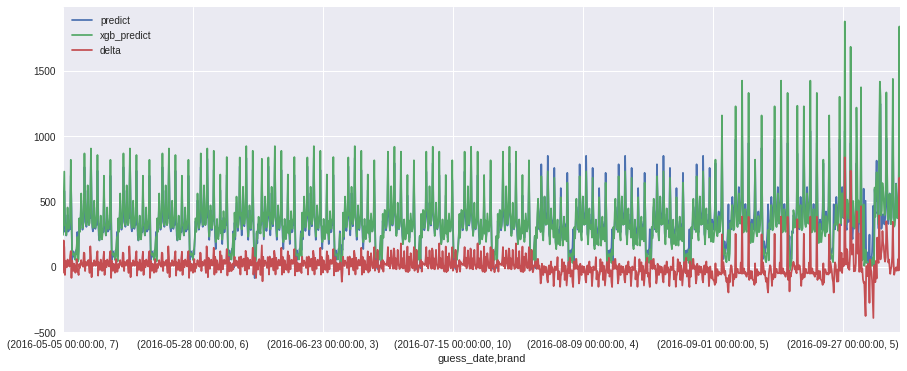

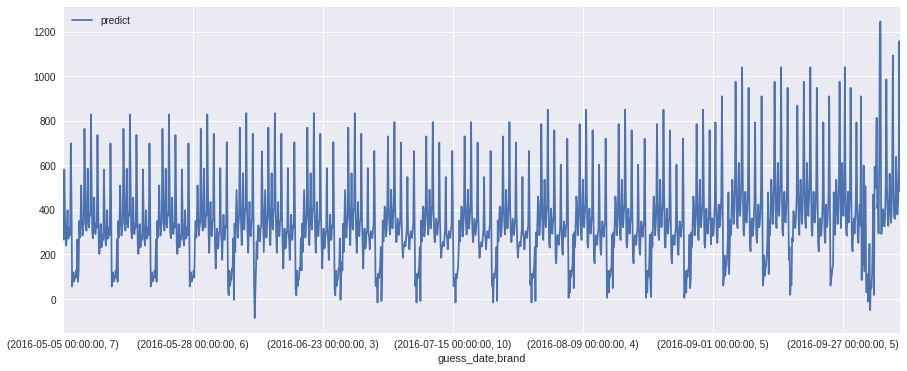

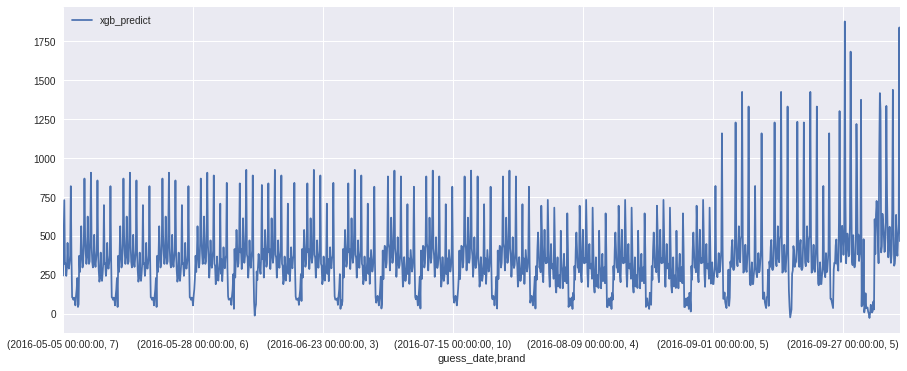

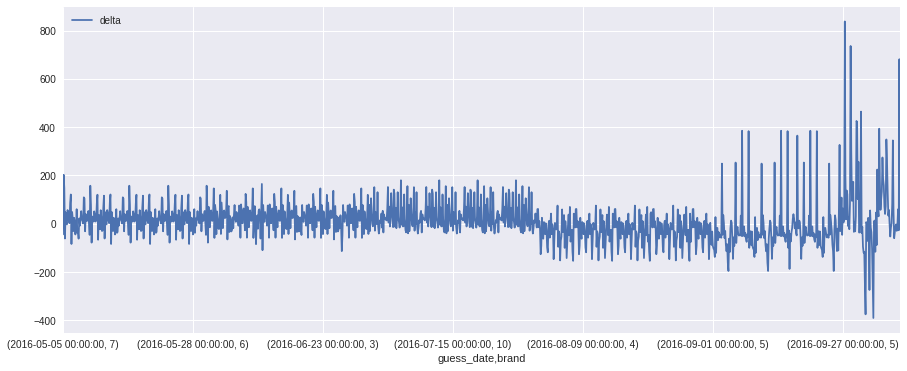

In [20]:
df.set_index(['guess_date','brand'])[['predict', 'xgb_predict', 'delta']].plot(figsize=(15,6))
df.set_index(['guess_date','brand'])[['predict']].plot(figsize=(15,6))
df.set_index(['guess_date','brand'])[['xgb_predict']].plot(figsize=(15,6))
df.set_index(['guess_date','brand'])[['delta']].plot(figsize=(15,6))


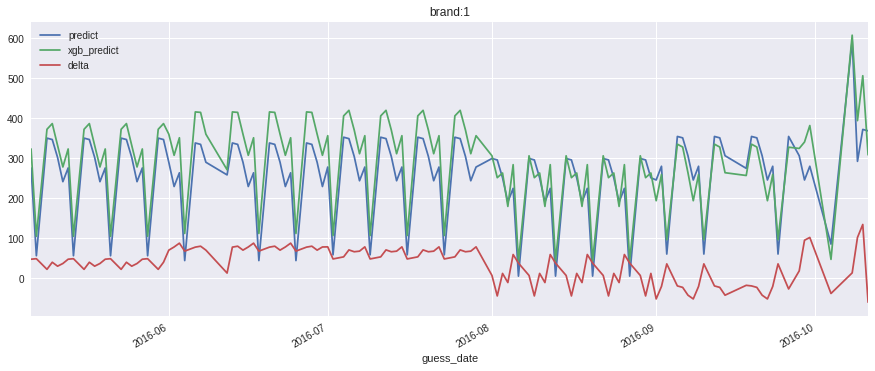

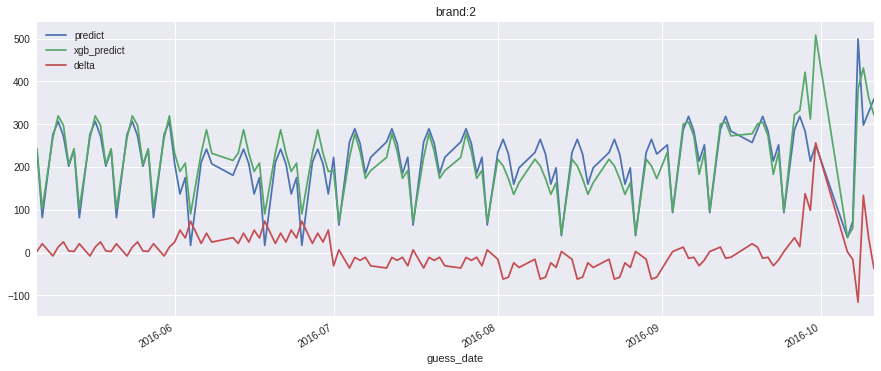

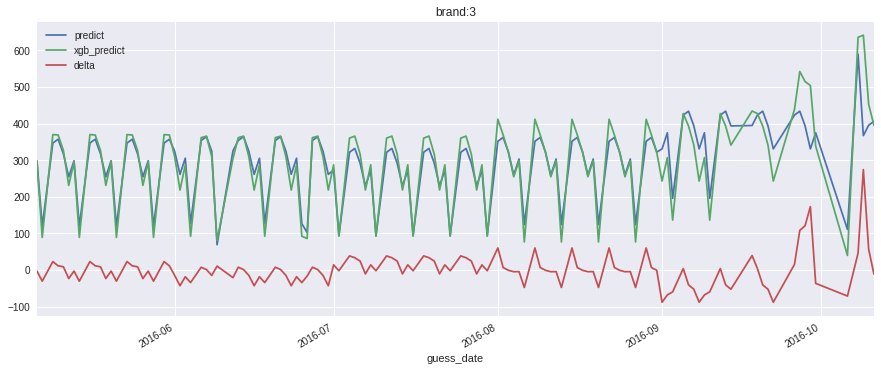

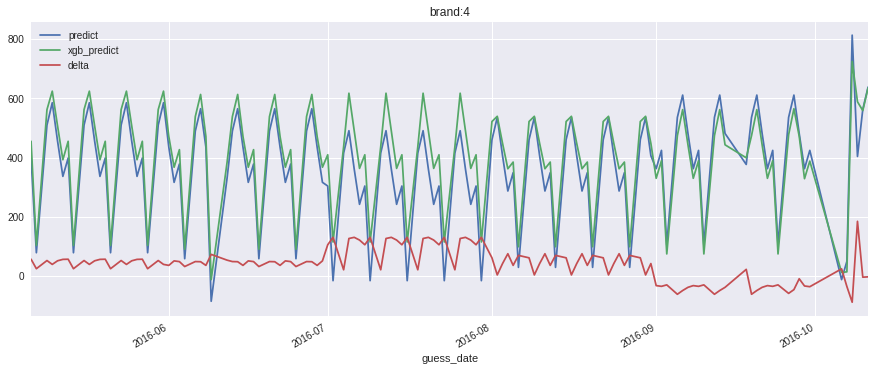

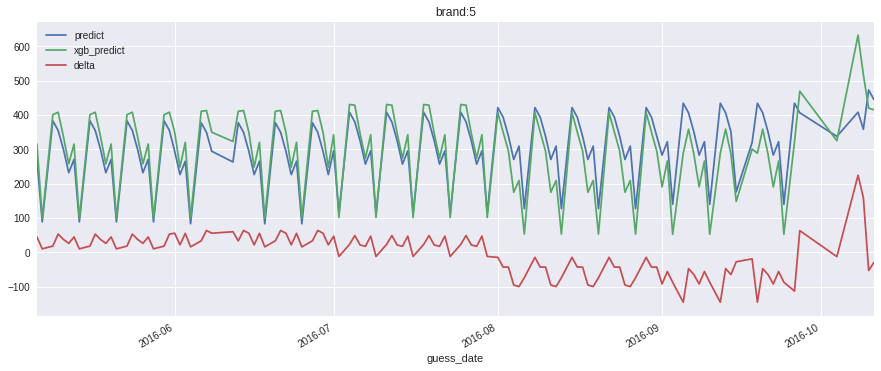

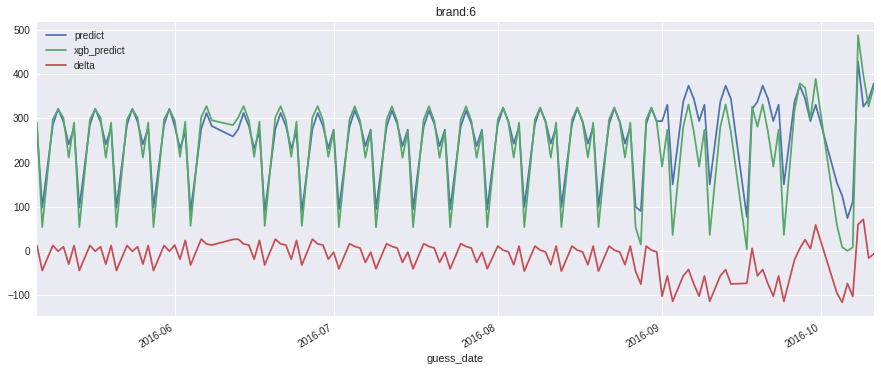

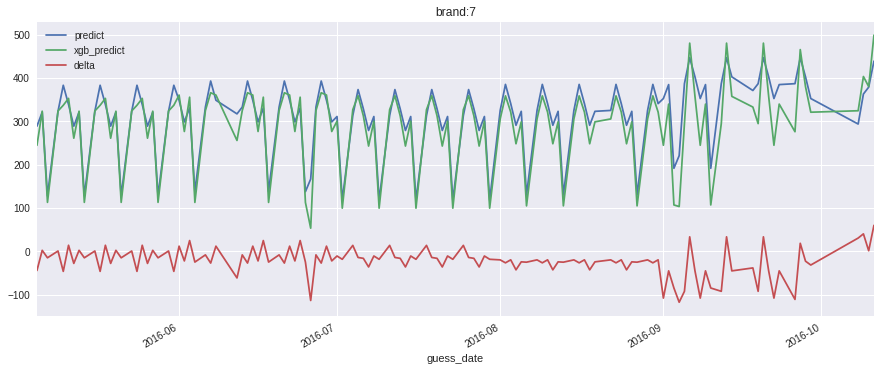

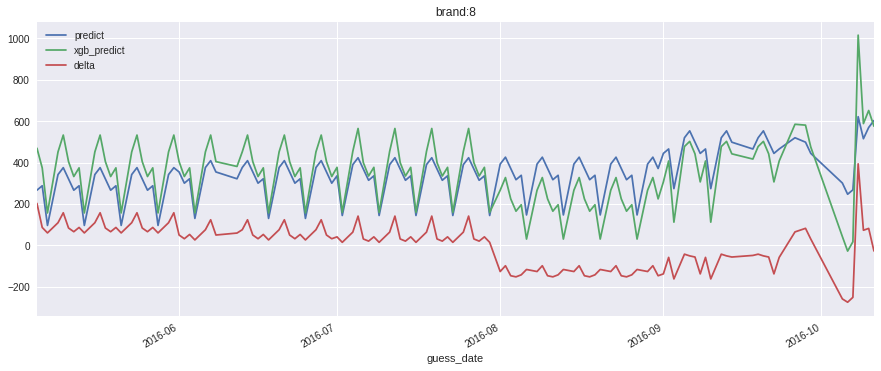

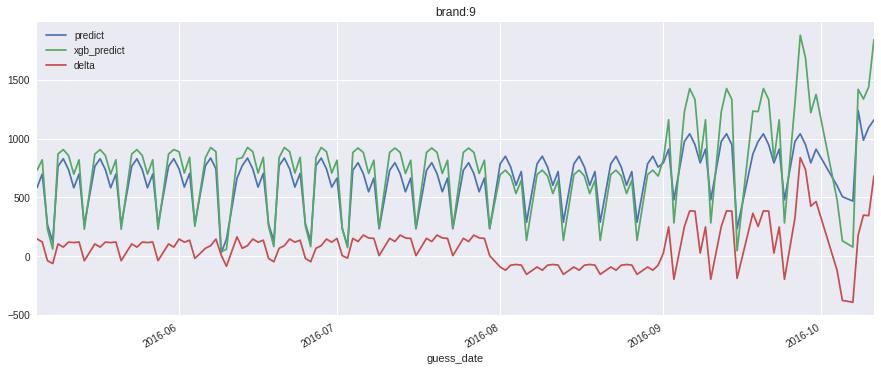

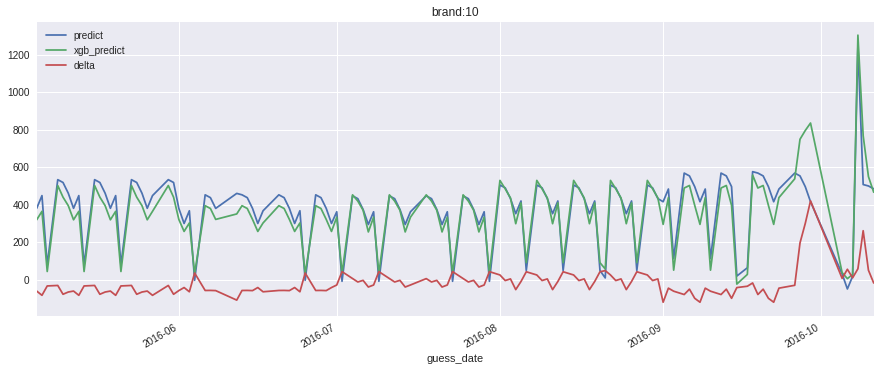

In [24]:
for b in range(1,11):
    drawDf = df[df.brand==b]
    drawDf.set_index(['guess_date'])[['predict', 'xgb_predict', 'delta']].plot(figsize=(15,6))
    plt.title('brand:%d'%b)
#     drawDf.set_index(['guess_date','brand'])[['predict']].plot(figsize=(15,6))
#     drawDf.set_index(['guess_date','brand'])[['xgb_predict']].plot(figsize=(15,6))
#     drawDf.set_index(['guess_date','brand'])[['delta']].plot(figsize=(15,6))
